In [196]:
from glob import glob
from os.path import splitext,join
from glob import glob

from numpy import *
import numpy as np
from numpy.random import rand
from scipy.stats import linregress
from numpy.linalg import norm

import MDAnalysis
import MDAnalysis.analysis.hbonds
import MDAnalysis.analysis.distances
from MDAnalysis.analysis.dihedrals import Ramachandran

from matplotlib.pyplot import *
from matplotlib.cm import *
from matplotlib.colors import ListedColormap

%matplotlib inline

(1, 20)

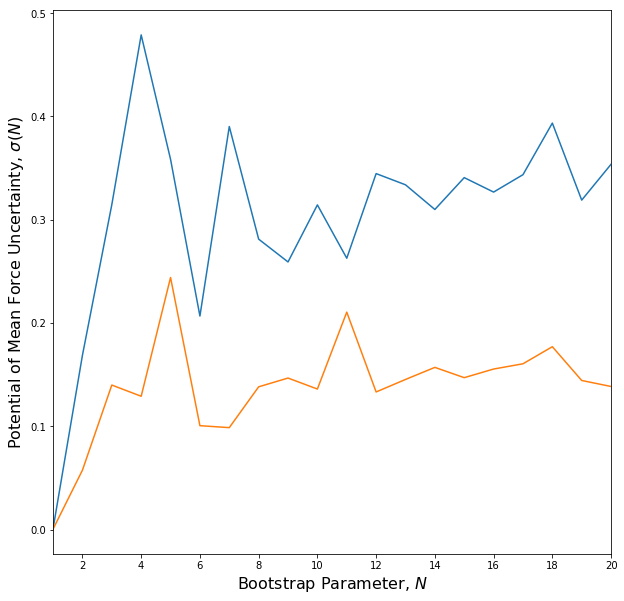

In [2]:
f = figure(figsize=(10,10))
dY = []
dZ = []

for n in range(1,21) :
    _,_,dy = genfromtxt('./umbrella-sampling-data/hairpin1_pulling_umbrella/bsResult{'+str(n).zfill(1)+'}.xvg',dtype=float,skip_header=13).T
    _,_,dz = genfromtxt('./umbrella-sampling-data/helix1_pulling_umbrella/bsResult{'+str(n).zfill(1)+'}.xvg',dtype=float,skip_header=13).T


    dz = mean(dz)
    dy = mean(dy)
    
    dY += [dy]
    dZ += [dz]

plot(range(1,21),dY)
plot(range(1,21),dZ)

xlabel(r'Bootstrap Parameter, $N$',fontsize=16)
ylabel(r'Potential of Mean Force Uncertainty, $\sigma(N)$',fontsize=16);

ax = f.gca()
#...
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xlim(1,20)

./umbrella-sampling-data/helix1_pulling_umbrella/25-struct


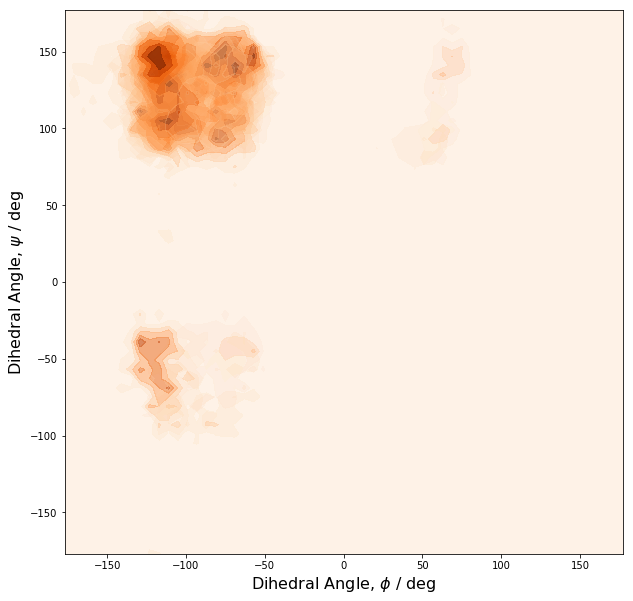

In [220]:
for k,i in enumerate([25]) :
    
    mol_path = join('./umbrella-sampling-data/helix1_pulling_umbrella',str(i).zfill(2)+'-struct')
    print mol_path

    u = MDAnalysis.Universe(
            join(mol_path,'struct.gro'),
            join(mol_path,'umbrella.xtc'))
        
    r = u.select_atoms("resid 8439-8451")
    R = Ramachandran(r).run()

    res = 60
    H = []
    xedges,yedges = linspace(-180,180,res+1),linspace(-180,180,res+1)
    n_time,n_res,_ = R.angles.shape
    
    for n in range(n_res):
        
        phi,psi = R.angles[:,n].T
        h,xedges,yedges = histogram2d(psi,phi, bins=[xedges,yedges],normed=True)
        xbins,ybins = (xedges[1:]+xedges[:-1])/2,(yedges[1:]+yedges[:-1])/2

        h /= amax(h)
        H += [ h ]
    
    H = array(H)
    
# Choose colormap
cmap = Oranges

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

# Create new colormap
my_cmap = ListedColormap(my_cmap)

figure(figsize=(10,10))
for h in H:
    contourf(xbins,ybins,h,cmap=my_cmap);
        
xlabel(r'Dihedral Angle, $\phi$ / $\mathrm{deg}$',fontsize=16)
ylabel(r'Dihedral Angle, $\psi$ / $\mathrm{deg}$',fontsize=16);